                                            SUB: LP-IV
                                        AutoEncoder Assignment
             Name: Abhishek Bhakare                                        Roll No: 3073
             Problem Statement: Use Autoencoder to implement anomaly detection. Build the model by using:
    a. Import required libraries
    b. Upload / access the dataset
    c. Encoder converts it into latent representation
    d. Decoder networks convert it back to the original input
    e. Compile the models with Optimizer, Loss, and Evaluation Metrics.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
data = pd.read_csv('/home/abhishek/Downloads/creditcard.csv')

# Preview dataset
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Separate the features and the target
X = data.drop('Class', axis=1)  # Features (excluding the 'Class' column)
y = data['Class']  # Labels (fraud or not fraud)

In [6]:
# Scale the features for better performance with neural networks
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# We will train the autoencoder only on normal transactions (Class = 0)
X_train_normal = X_train[y_train == 0]
X_test_normal = X_test[y_test == 0]
X_test_fraud = X_test[y_test == 1]

In [9]:
input_dim = X_train_normal.shape[1]  # Number of features (30 features in the credit card dataset)
encoding_dim = 16  # Size of the encoding layer (latent space)

# Define the autoencoder model

In [10]:
autoencoder = Sequential([
    # Encoder network: Reducing the dimensions gradually
    Dense(encoding_dim, activation='relu', input_shape=(input_dim,)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    
    # Decoder network: Expanding back to original dimension
    Dense(8, activation='relu'),
    Dense(encoding_dim, activation='relu'),
    Dense(input_dim, activation='sigmoid')  # Use sigmoid for binary data between 0 and 1
])

In [11]:
# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

# Print the model summary
autoencoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,362 (5.32 KB)

 Trainable params: 1,362 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the autoencoder
history = autoencoder.fit(X_train_normal, X_train_normal, epochs=50, batch_size=32, 
                          validation_split=0.2, shuffle=True, verbose=1)


Epoch 1/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.3254 - loss: 0.8035 - val_accuracy: 0.2996 - val_loss: 0.8250
Epoch 2/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.3205 - loss: 0.8001 - val_accuracy: 0.3262 - val_loss: 0.8240
Epoch 3/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.3321 - loss: 0.8209 - val_accuracy: 0.3323 - val_loss: 0.8249
Epoch 4/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.3214 - loss: 0.8031 - val_accuracy: 0.3189 - val_loss: 0.8240
Epoch 5/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.3276 - loss: 0.7890 - val_accuracy: 0.3124 - val_loss: 0.8242
Epoch 6/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.3228 - loss: 0.7926 - val_accuracy: 0.3218 - val_loss: 0.8243
Epoch 7/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.3268 - loss: 0.7989 - val_accuracy: 0.3371 - val_loss: 0.8241
Epoch 8/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.3331 - loss: 0

In [19]:
# Make predictions (reconstructions) on test data
reconstructions = autoencoder.predict(X_test)

# Calculate the reconstruction error
reconstruction_errors = np.mean(np.square(X_test - reconstructions), axis=1)

# Set a threshold for anomaly detection (95th percentile of reconstruction errors from normal test data)
threshold = np.percentile(reconstruction_errors, 95)

# Flag transactions as anomalies if the reconstruction error exceeds the threshold
anomalies = reconstruction_errors > threshold

# Evaluate the model using the classification report
print(classification_report(y_test, anomalies))


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.90      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962



# Plot training and validation loss

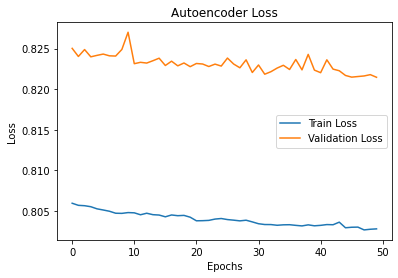

In [21]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
